# CCADMACL (Midterm Exam)

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter

## Load the datasets

In [2]:
face_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/face.csv?raw=true")
chrome_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/chrome.csv?raw=true")
lines2_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/lines2.csv?raw=true")
supernova_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/supernova.csv?raw=true")
network_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/network.csv?raw=true")
spirals_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/spirals.csv?raw=true")
densedisk_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/densedisk.csv?raw=true")
rings_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/rings.csv?raw=true")
chainlink_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/chainlink.csv?raw=true")

In [54]:
print(face_df.shape[0])
print(chrome_df.shape[0])
print(lines2_df .shape[0])
print(supernova_df .shape[0])
print(network_df.shape[0])
print(spirals_df.shape[0])
print(densedisk_df .shape[0])
print(rings_df.shape[0])
print(chainlink_df.shape[0])

1273
11093
6195
10714
2634
2328
5000
1000
1000


## Plot the datasets

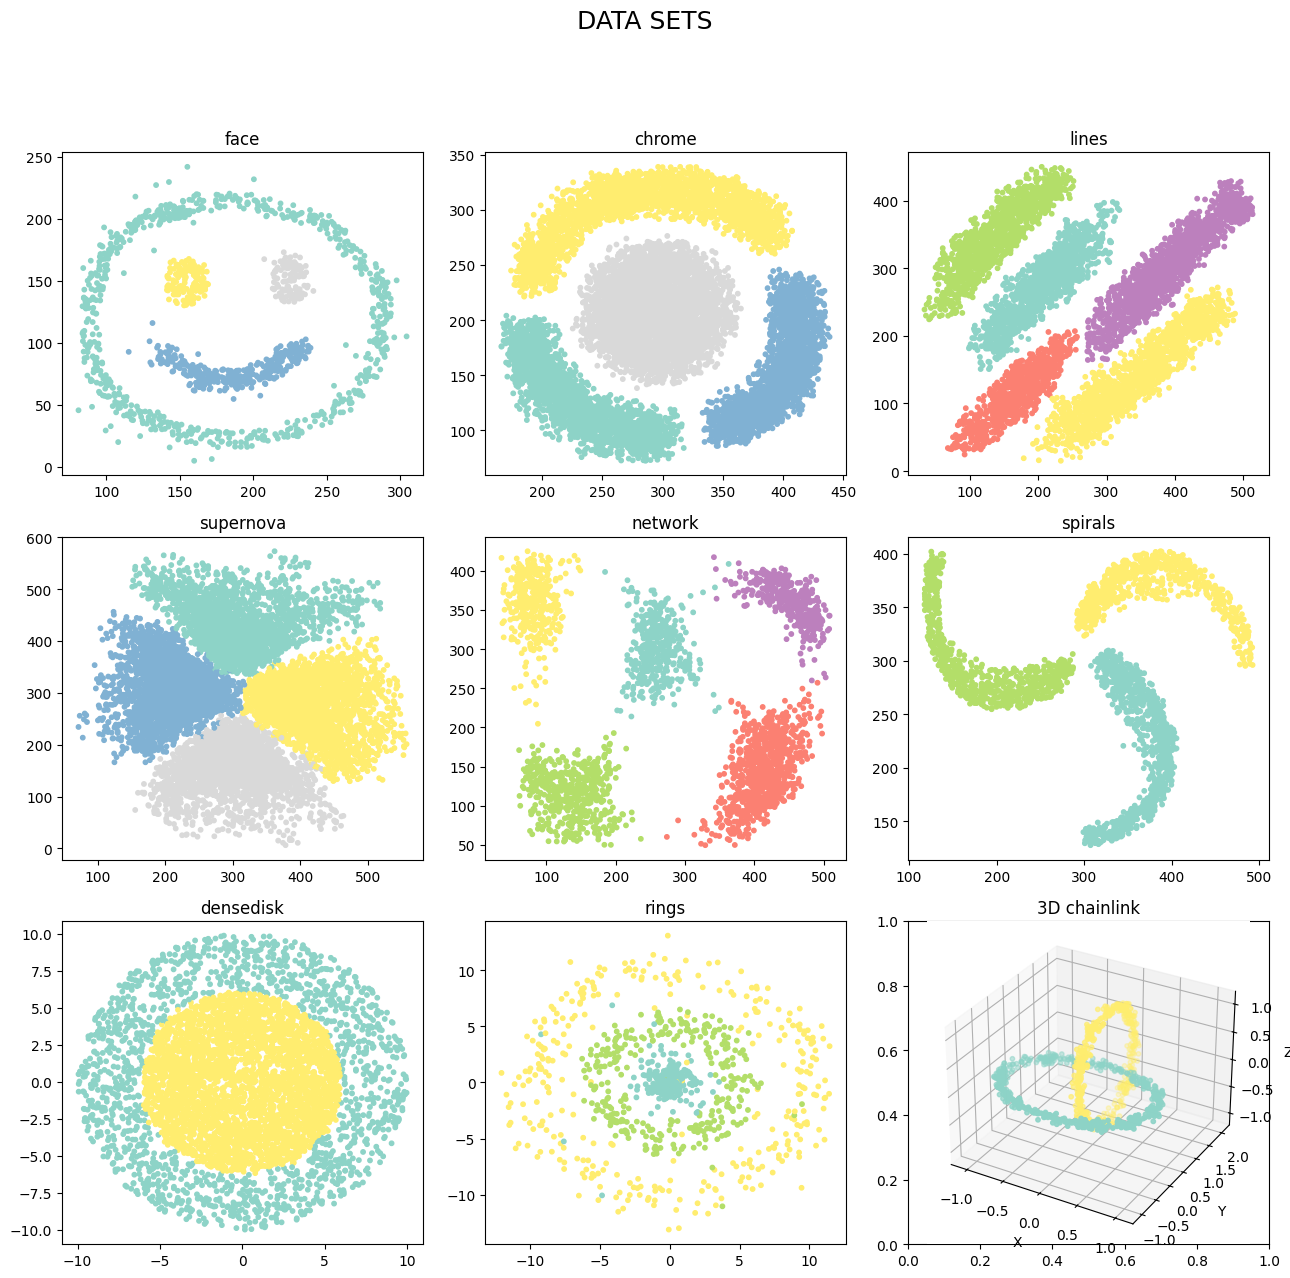

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")

axes[0, 1].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[0, 1].set_title("chrome")

axes[0, 2].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[0, 2].set_title("lines")

axes[1, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("supernova")

axes[1, 1].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[1, 1].set_title("network")

axes[1, 2].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[1, 2].set_title("spirals")

axes[2, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("densedisk")

axes[2, 1].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[2, 1].set_title("rings")

# Add a 3D plot
ax3d = fig.add_subplot(3, 3, 9, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

## A. Use K-means to cluster each dataset

1. Create each copy of the dataset for k-means

In [5]:
# put your answer here
kmeans_face = face_df.copy()
kmeans_chrome = chrome_df.copy()
kmeans_lines2 = lines2_df.copy()
kmeans_supernova = supernova_df.copy()
kmeans_network = network_df.copy()
kmeans_spirals = spirals_df.copy()
kmeans_densedisk = densedisk_df.copy()
kmeans_rings = rings_df.copy()
kmeans_chainlink = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [6]:
# put your answer here
kmeans_face = kmeans_face.drop(columns=['color'])
kmeans_chrome = kmeans_chrome.drop(columns=['color'])
kmeans_lines2 = kmeans_lines2.drop(columns=['color'])
kmeans_supernova = kmeans_supernova.drop(columns=['color'])
kmeans_network = kmeans_network.drop(columns=['color'])
kmeans_spirals = kmeans_spirals.drop(columns=['color'])
kmeans_densedisk = kmeans_densedisk.drop(columns=['color'])
kmeans_rings = kmeans_rings.drop(columns=['color'])
kmeans_chainlink = kmeans_chainlink.drop(columns=['color'])

3. Train a K-means model for each dataset.

In [21]:
def train_kmeans(data, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=43)
    kmeans.fit(data[['x', 'y']] if 'z' not in data.columns else data[['x', 'y', 'z']])

    return kmeans

In [22]:
# put your answer here
kmeans_face_model = train_kmeans(kmeans_face, n_clusters=4)
kmeans_chrome_model = train_kmeans(kmeans_chrome, n_clusters=4)
kmeans_lines2_model = train_kmeans(kmeans_lines2, n_clusters=5)
kmeans_supernova_model = train_kmeans(kmeans_supernova, n_clusters=4)
kmeans_network_model = train_kmeans(kmeans_network, n_clusters=5)
kmeans_spirals_model = train_kmeans(kmeans_spirals, n_clusters=3)
kmeans_densedisk_model = train_kmeans(kmeans_densedisk, n_clusters=2)
kmeans_rings_model = train_kmeans(kmeans_rings, n_clusters=3)
kmeans_chainlink_model = train_kmeans(kmeans_chainlink, n_clusters=2)

4. Add a "Cluster" column for each data set

In [24]:
def add_clusters(data, model):
    data['kmeans_cluster'] = model.labels_

In [25]:
# put your answer here
add_clusters(kmeans_face, kmeans_face_model)
add_clusters(kmeans_chrome, kmeans_chrome_model)
add_clusters(kmeans_lines2, kmeans_lines2_model)
add_clusters(kmeans_supernova, kmeans_supernova_model)
add_clusters(kmeans_network, kmeans_network_model)
add_clusters(kmeans_spirals, kmeans_spirals_model)
add_clusters(kmeans_densedisk, kmeans_densedisk_model)
add_clusters(kmeans_rings, kmeans_rings_model)
add_clusters(kmeans_chainlink, kmeans_chainlink_model)

5. Plot the Correct cluster and the K-means cluster

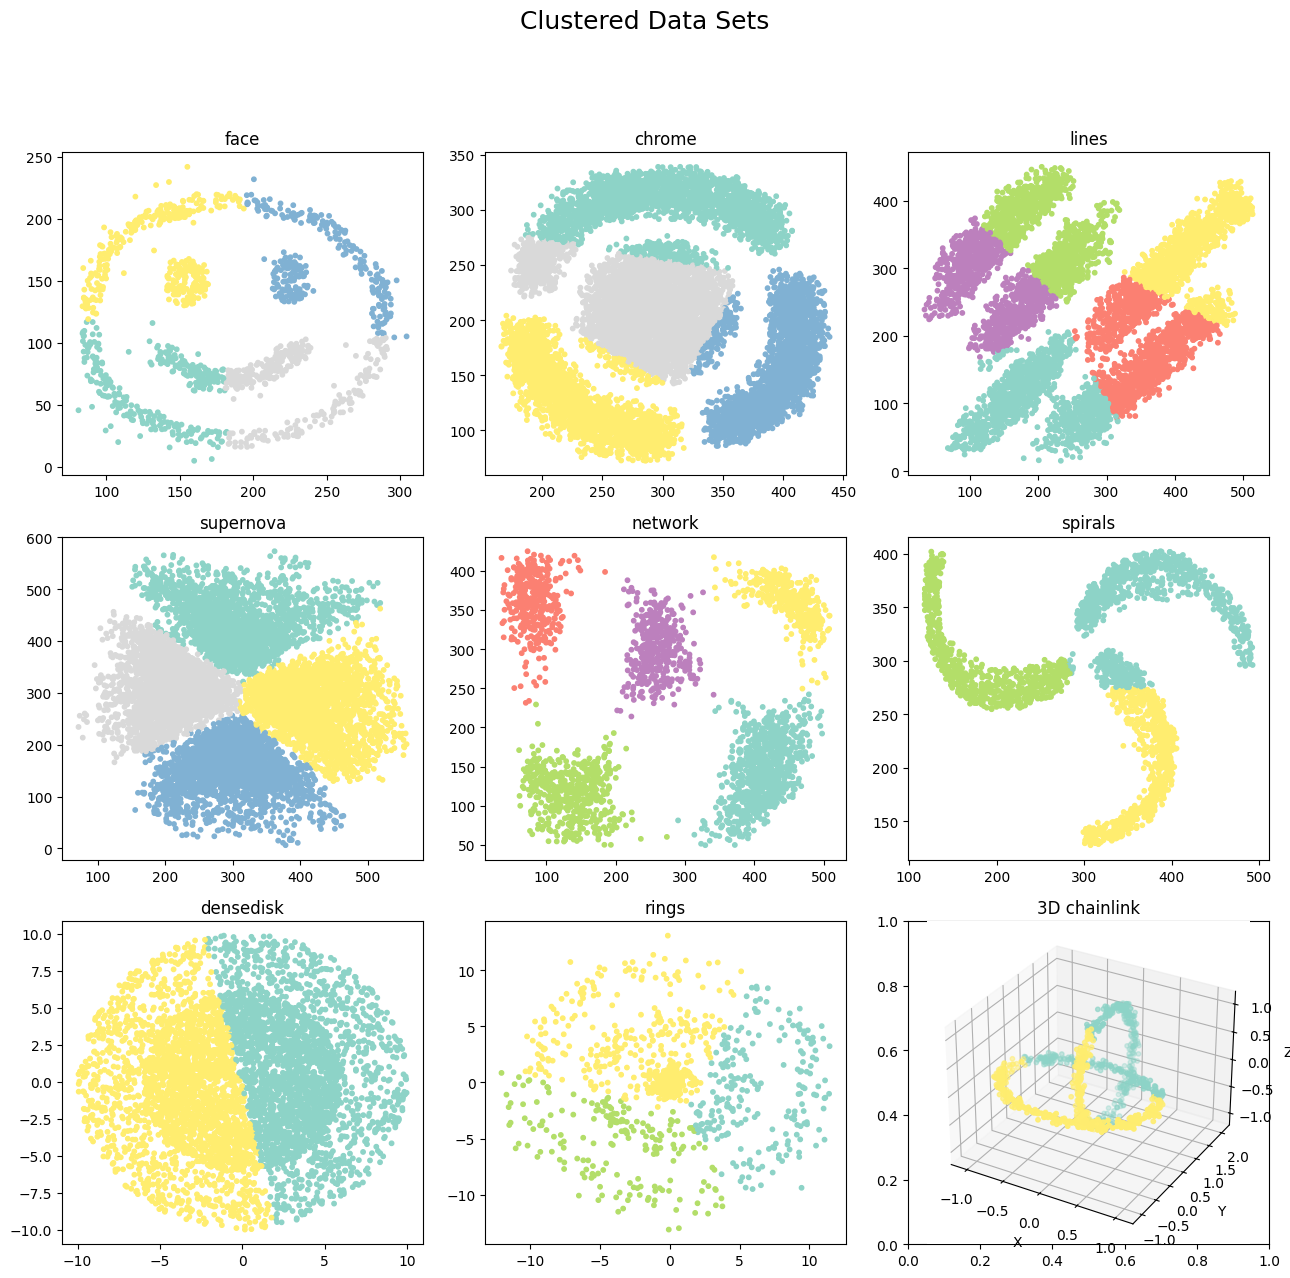

In [26]:
# put your answer here
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
fig.suptitle('Clustered Data Sets\n', size=18)

# Function to plot 2D datasets
def plot_2d(ax, data, title):
    scatter = ax.scatter(data['x'], data['y'], c=data['kmeans_cluster'], s=10, cmap='Set3')
    ax.set_title(title)

# Plot each 2D dataset
plot_2d(axes[0, 0], kmeans_face, "face")
plot_2d(axes[0, 1], kmeans_chrome, "chrome")
plot_2d(axes[0, 2], kmeans_lines2, "lines")
plot_2d(axes[1, 0], kmeans_supernova, "supernova")
plot_2d(axes[1, 1], kmeans_network, "network")
plot_2d(axes[1, 2], kmeans_spirals, "spirals")
plot_2d(axes[2, 0], kmeans_densedisk, "densedisk")
plot_2d(axes[2, 1], kmeans_rings, "rings")

# Plot the 3D dataset
ax3d = fig.add_subplot(3, 3, 9, projection='3d')
scatter = ax3d.scatter(
    kmeans_chainlink['x'], kmeans_chainlink['y'], kmeans_chainlink['z'],
    c=kmeans_chainlink['kmeans_cluster'], cmap="Set3", s=10
)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## B. Use Agglomerative Clustering to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [27]:
# put your answer here
agg_face = face_df.copy()
agg_chrome = chrome_df.copy()
agg_lines2 = lines2_df.copy()
agg_supernova = supernova_df.copy()
agg_network = network_df.copy()
agg_spirals = spirals_df.copy()
agg_densedisk = densedisk_df.copy()
agg_rings = rings_df.copy()
agg_chainlink = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [28]:
# put your answer here
agg_face = agg_face.drop(columns=['color'])
agg_chrome = agg_chrome.drop(columns=['color'])
agg_lines2 = agg_lines2.drop(columns=['color'])
agg_supernova = agg_supernova.drop(columns=['color'])
agg_network = agg_network.drop(columns=['color'])
agg_spirals = agg_spirals.drop(columns=['color'])
agg_densedisk = agg_densedisk.drop(columns=['color'])
agg_rings = agg_rings.drop(columns=['color'])
agg_chainlink = agg_chainlink.drop(columns=['color'])

3. Train a Agglomerative Clustering model for each dataset.

In [38]:
def train_agg_clustering(data, n_clusters):
    agg_model = AgglomerativeClustering(n_clusters=n_clusters)
    return agg_model

In [40]:
# put your answer here
agg_face_model = train_agg_clustering(agg_face, 4)
agg_chrome_model = train_agg_clustering(agg_chrome, 4)
agg_lines2_model = train_agg_clustering(agg_lines2, 5)
agg_supernova_model = train_agg_clustering(agg_supernova, 4)
agg_network_model = train_agg_clustering(agg_network, 5)
agg_spirals_model = train_agg_clustering(agg_spirals, 3)
agg_densedisk_model = train_agg_clustering(agg_densedisk, 2)
agg_rings_model = train_agg_clustering(agg_rings, 3)
agg_chainlink_model = train_agg_clustering(agg_chainlink, 2)

4. Add a "Cluster" column for each data set

In [41]:
def add_agg_clusters(data, model):
    data['agg_cluster'] = model.fit_predict(data[['x', 'y']])

In [42]:
add_agg_clusters(agg_face, agg_face_model)
add_agg_clusters(agg_chrome, agg_chrome_model)
add_agg_clusters(agg_lines2, agg_lines2_model)
add_agg_clusters(agg_supernova, agg_supernova_model)
add_agg_clusters(agg_network, agg_network_model)
add_agg_clusters(agg_spirals, agg_spirals_model)
add_agg_clusters(agg_densedisk, agg_densedisk_model)
add_agg_clusters(agg_rings, agg_rings_model)
add_agg_clusters(agg_chainlink, agg_chainlink_model)

5. Plot the Correct cluster and the Agglomerative cluster

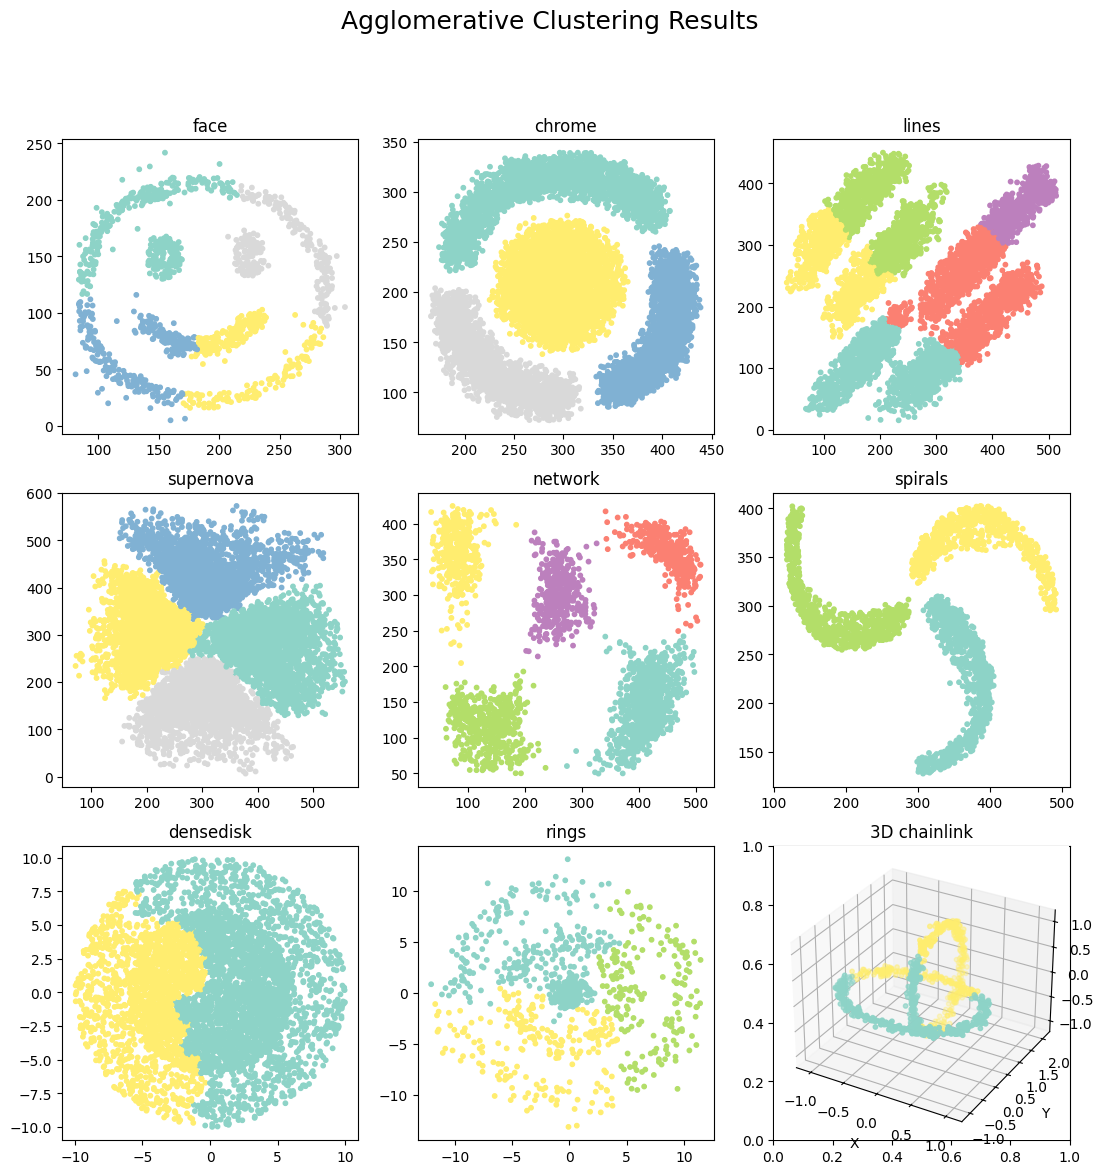

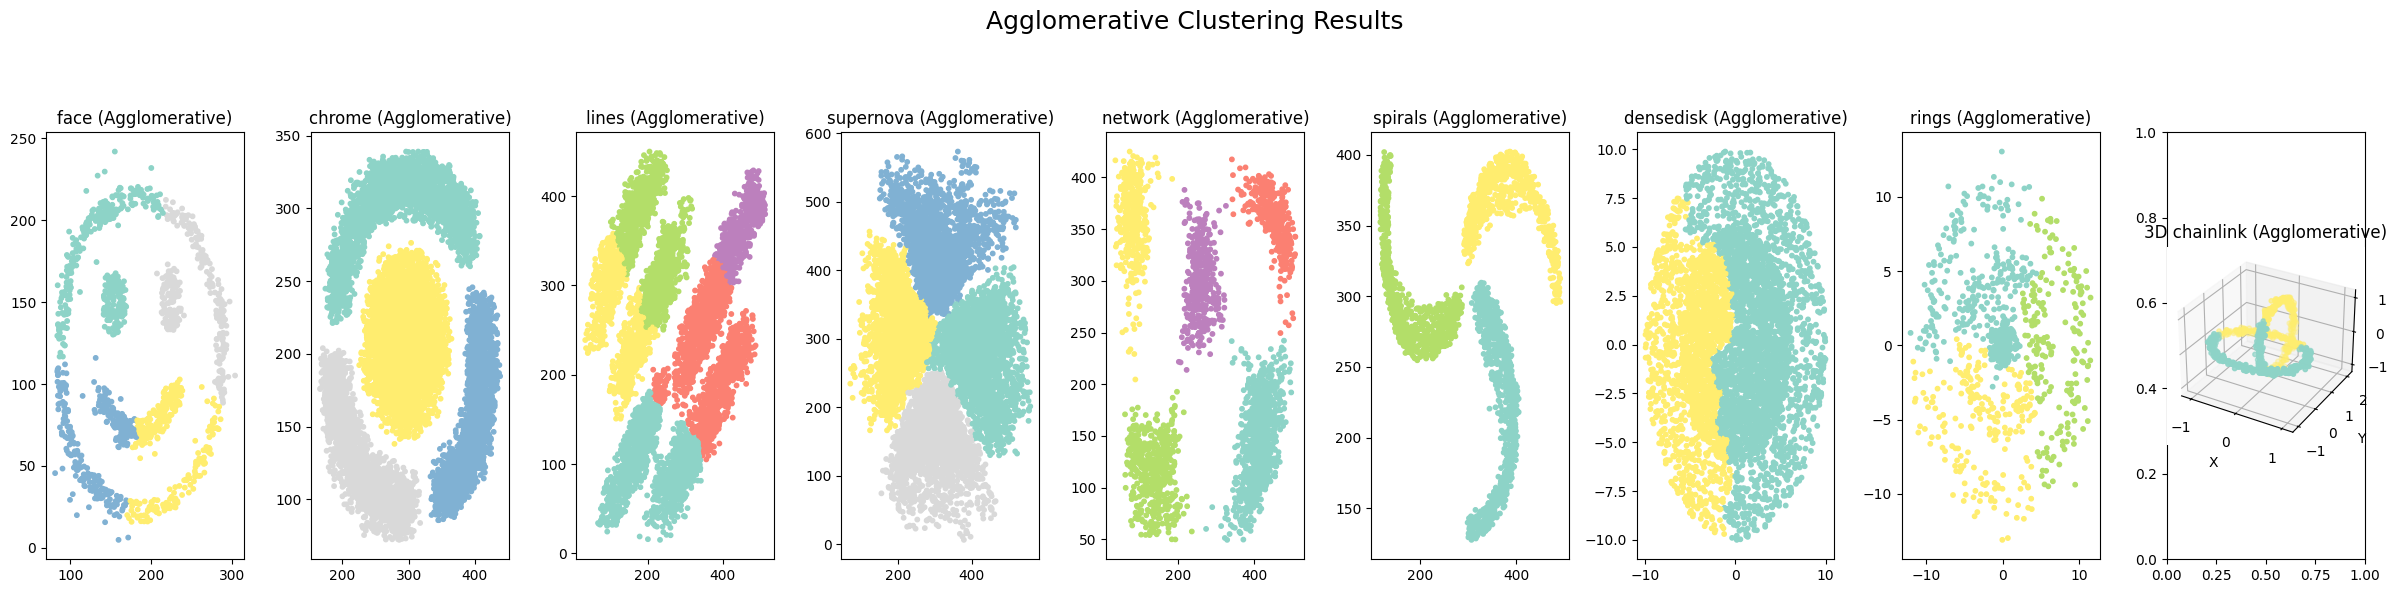

In [646]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
fig.suptitle('Agglomerative Clustering Results\n', size=18)

# Function to plot 2D datasets
def plot_2d(ax, data, title):
    scatter = ax.scatter(data['x'], data['y'], c=data['agg_cluster'], s=10, cmap='Set3')
    ax.set_title(title)

# Plot each 2D dataset
plot_2d(axes[0, 0], agg_face, "face")
plot_2d(axes[0, 1], agg_chrome, "chrome")
plot_2d(axes[0, 2], agg_lines2, "lines")
plot_2d(axes[1, 0], agg_supernova, "supernova")
plot_2d(axes[1, 1], agg_network, "network")
plot_2d(axes[1, 2], agg_spirals, "spirals")
plot_2d(axes[2, 0], agg_densedisk, "densedisk")
plot_2d(axes[2, 1], agg_rings, "rings")

# Plot the 3D dataset
ax3d = fig.add_subplot(3, 3, 9, projection='3d')
scatter = ax3d.scatter(
    agg_chainlink['x'], agg_chainlink['y'], agg_chainlink['z'],
    c=agg_chainlink['agg_cluster'], cmap="Set3", s=10
)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## C. Use DBSCAN to cluster each dataset

In [629]:
# put your answer here
dbscan_face = face_df.copy()
dbscan_chrome = chrome_df.copy()
dbscan_lines2 = lines2_df.copy()
dbscan_supernova = supernova_df.copy()
dbscan_network = network_df.copy()
dbscan_spirals = spirals_df.copy()
dbscan_densedisk = densedisk_df.copy()
dbscan_rings = rings_df.copy()
dbscan_chainlink = chainlink_df.copy()

In [630]:
# put your answer here
dbscan_face.drop(columns=['color'], inplace=True)
dbscan_chrome.drop(columns=['color'], inplace=True)
dbscan_lines2.drop(columns=['color'], inplace=True)
dbscan_supernova.drop(columns=['color'], inplace=True)
dbscan_network.drop(columns=['color'], inplace=True)
dbscan_spirals.drop(columns=['color'], inplace=True)
dbscan_densedisk.drop(columns=['color'], inplace=True)
dbscan_rings.drop(columns=['color'], inplace=True)
dbscan_chainlink.drop(columns=['color'], inplace=True)

In [631]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd

def create_dbscan_model(data, eps, min_samples):
    """
    Creates and fits a DBSCAN model to the provided dataset.
    
    Parameters:
    - data: The dataset (DataFrame with 'x' and 'y' columns).
    - eps: The maximum distance between two samples for them to be considered as in the same neighborhood.
    - min_samples: The number of samples in a neighborhood for a point to be considered as a core point.
    
    Returns:
    - The fitted DBSCAN model and the dataset with the cluster labels added.
    """
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[['x', 'y']])  # Scale only x and y columns
    
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(scaled_data)
    
    # Convert scaled data back to DataFrame and add the cluster labels
    scaled_data_df = pd.DataFrame(scaled_data, columns=['x', 'y'])
    scaled_data_df['cluster'] = model.labels_
    
    return model, scaled_data_df

In [632]:
def create_dbscan_model_no_scale(data, eps, min_samples):
    model = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
    
    # Fit the model to the data
    model.fit(data[['x', 'y']])
    
    # Add the cluster labels to the dataset
    data['cluster'] = model.labels_
    
    return model, data

In [633]:
datasets_params = [
    (dbscan_face, 0.35, 25),
    (dbscan_chrome, 0.32, 200),
    (dbscan_lines2, 9.5, 6),
    (dbscan_supernova, 0.2, 100),
    (dbscan_network, 0.28, 93),
    (dbscan_spirals, 0.23, 80),
    (dbscan_densedisk, 0.23, 50),
    (dbscan_rings, 0.4, 300),
    (dbscan_chainlink, 0.5, 5)
]

In [634]:
models_and_data = []
for dataset, eps, min_samples in datasets_params:
    model, data_with_clusters = create_dbscan_model(dataset, eps, min_samples)
    models_and_data.append((model, data_with_clusters))

for spiral

In [635]:
# Creating DBSCAN models for each dataset
dbscan_spirals_model, dbscan_spirals_data = create_dbscan_model_no_scale(dbscan_spirals, 12, 30)

In [636]:
# Creating DBSCAN models for each dataset
dbscan_lines2_model, dbscan_lines2_data = create_dbscan_model_no_scale(dbscan_lines2, 12, 20)

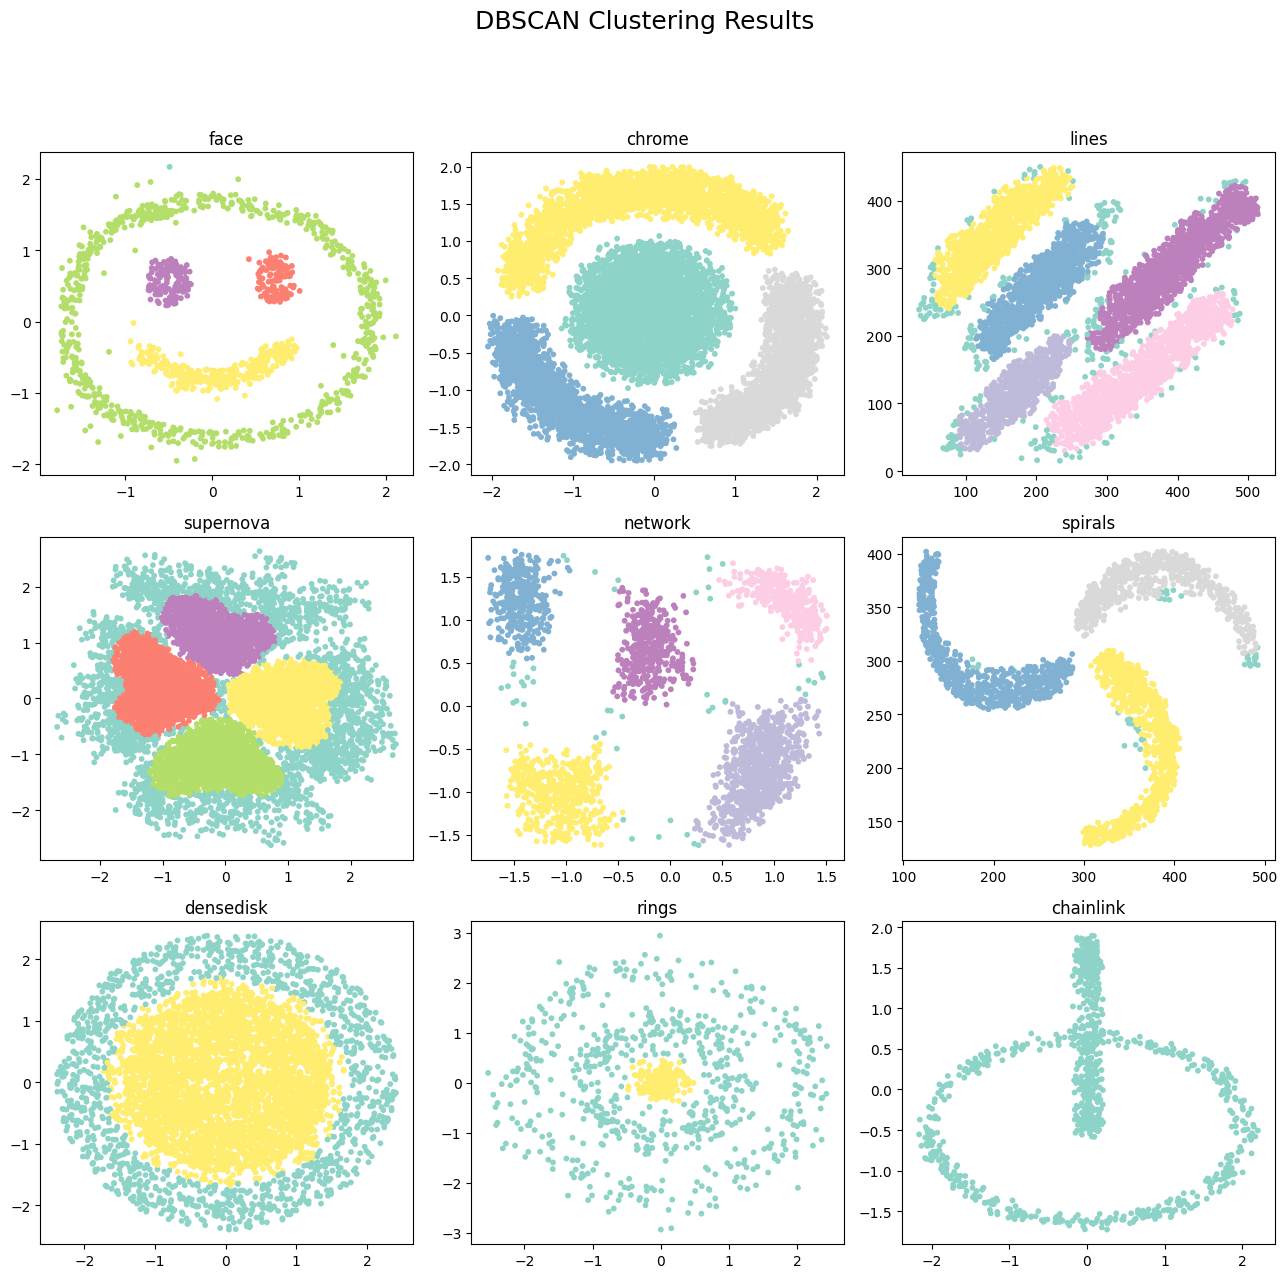

In [638]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot 2D datasets
def plot_2d(ax, data, title):
    scatter = ax.scatter(data['x'], data['y'], c=data['cluster'], s=10, cmap='Set3')
    ax.set_title(title)

# Set up the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
fig.suptitle('DBSCAN Clustering Results\n', size=18)

# Assuming 'models_and_data' contains a list of tuples (model, data) for each dataset
# Create the DBSCAN models and add them to the list
models_and_data = []

for data, eps, min_samples in datasets_params:
    model, clustered_data = create_dbscan_model(data, eps, min_samples)
    models_and_data.append((model, clustered_data))

# Plot each 2D dataset
plot_2d(axes[0, 0], models_and_data[0][1], "face")
plot_2d(axes[0, 1], models_and_data[1][1], "chrome")
plot_2d(axes[0, 2], dbscan_lines2_data, "lines")
plot_2d(axes[1, 0], models_and_data[3][1], "supernova")
plot_2d(axes[1, 1], models_and_data[4][1], "network")
plot_2d(axes[1, 2], dbscan_spirals_data, "spirals")
plot_2d(axes[2, 0], models_and_data[6][1], "densedisk")
plot_2d(axes[2, 1], models_and_data[7][1], "rings")
plot_2d(axes[2, 2], models_and_data[8][1], "chainlink")

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

1. Display the Correct cluster, K-means cluster, Agglomerative cluster and DBSCAN cluster in a single plot.

- Each row should contain each dataset
- Each column should contain each the correct cluster, k-means cluster, agglomerative cluster and DBSCAN cluster.

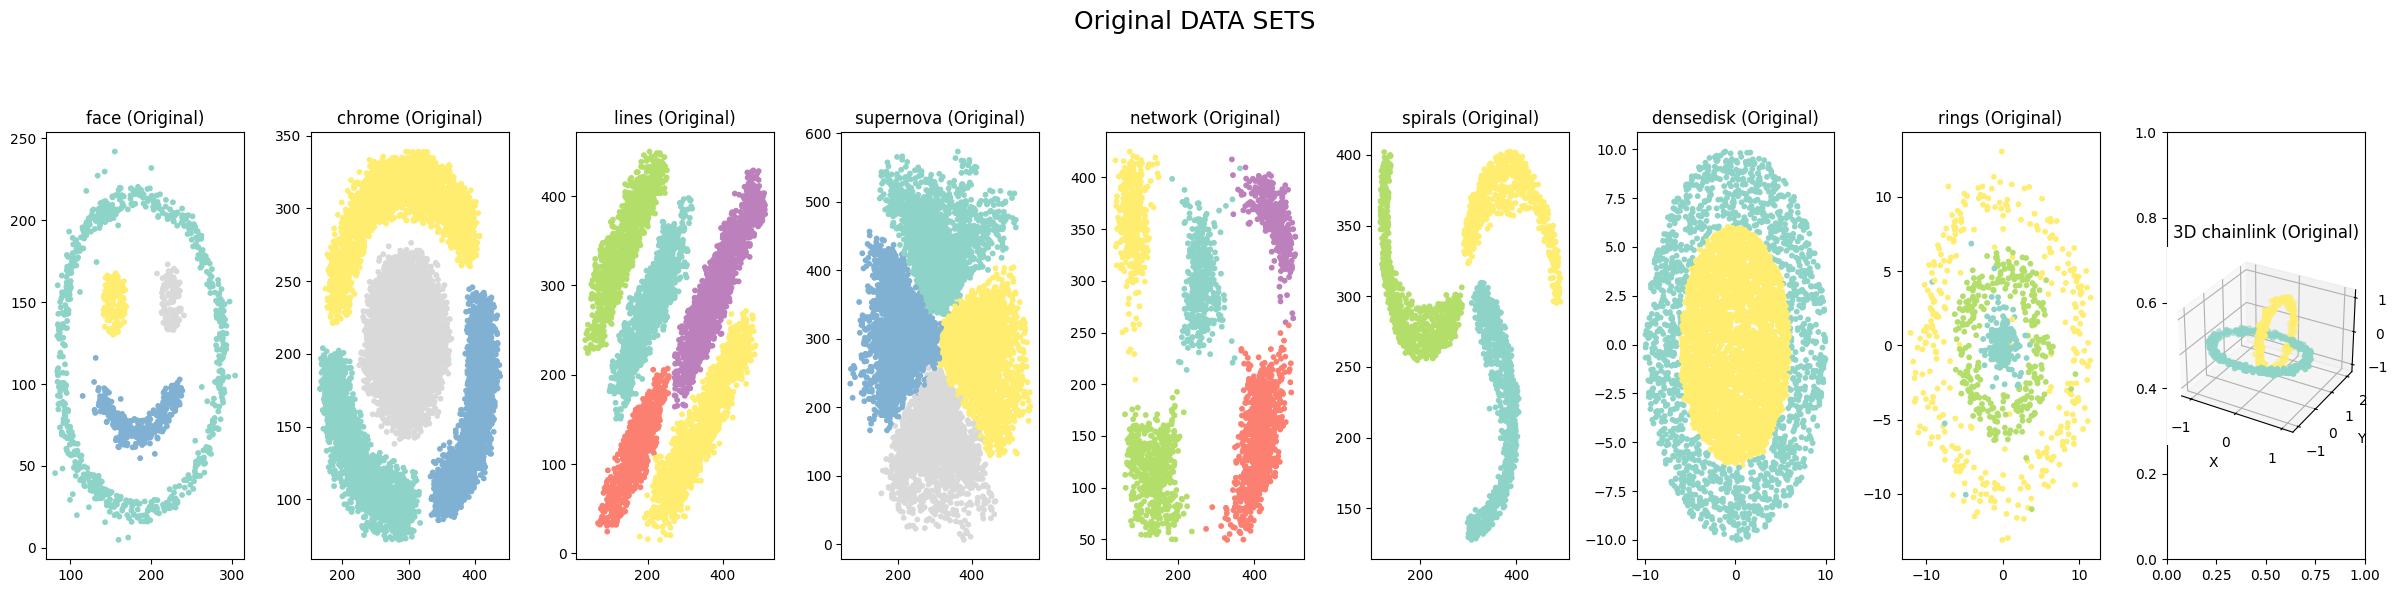

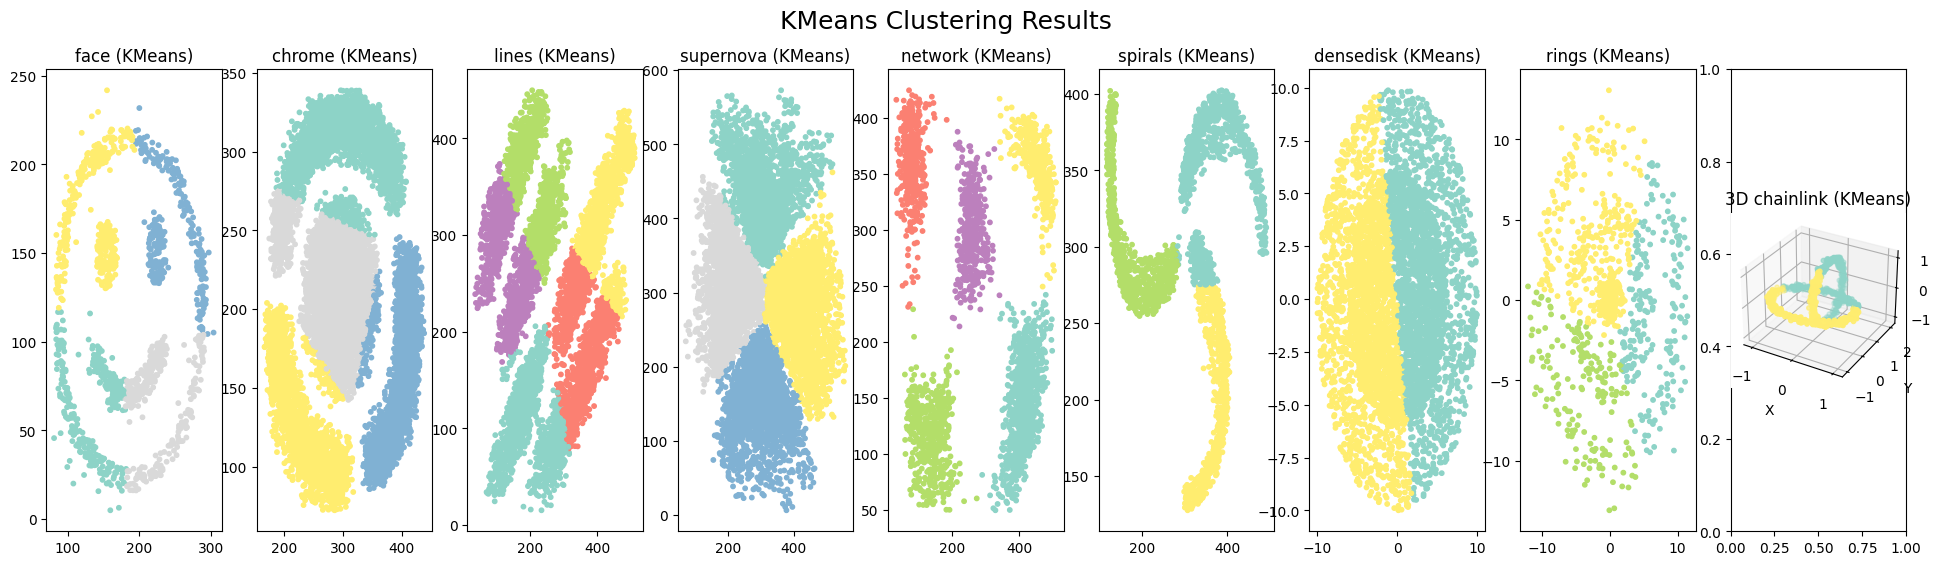

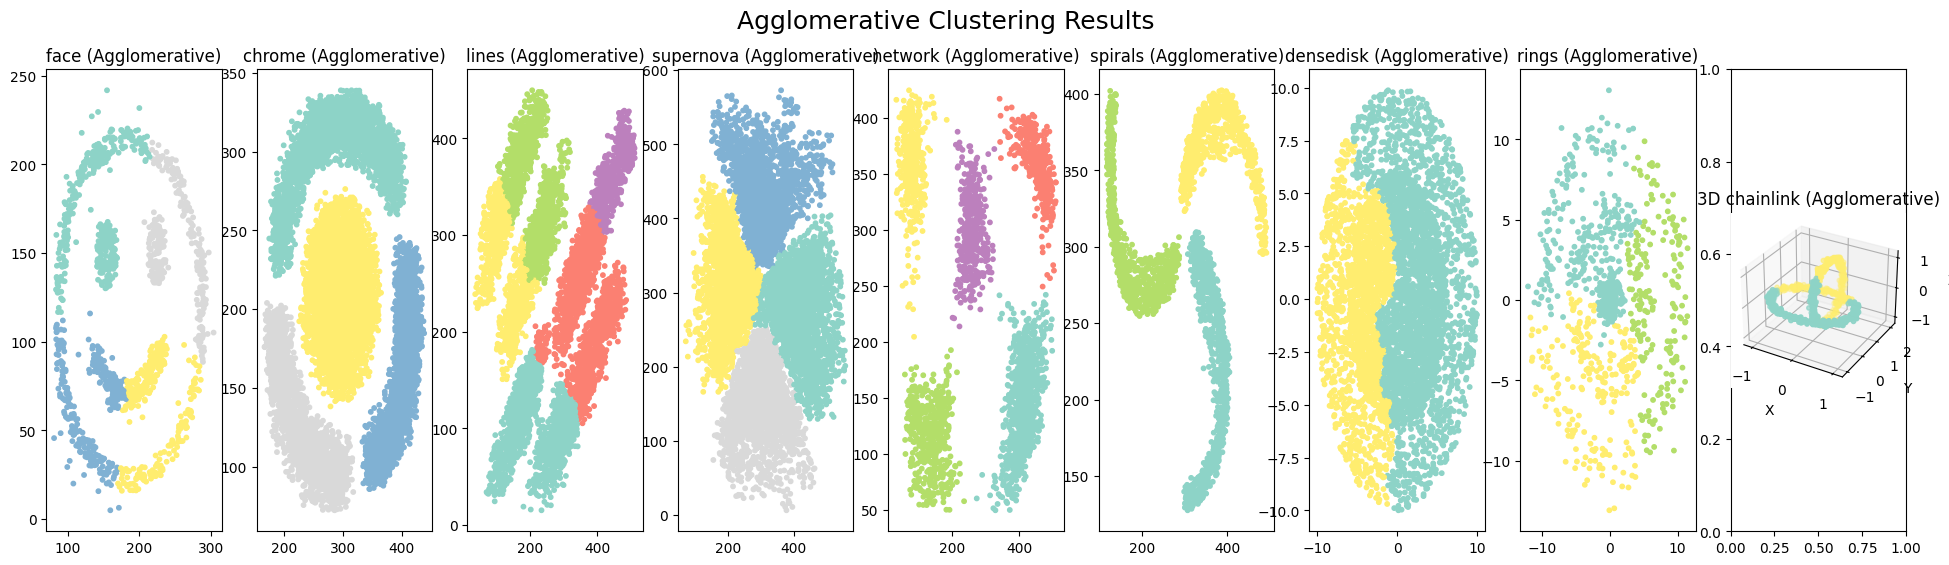

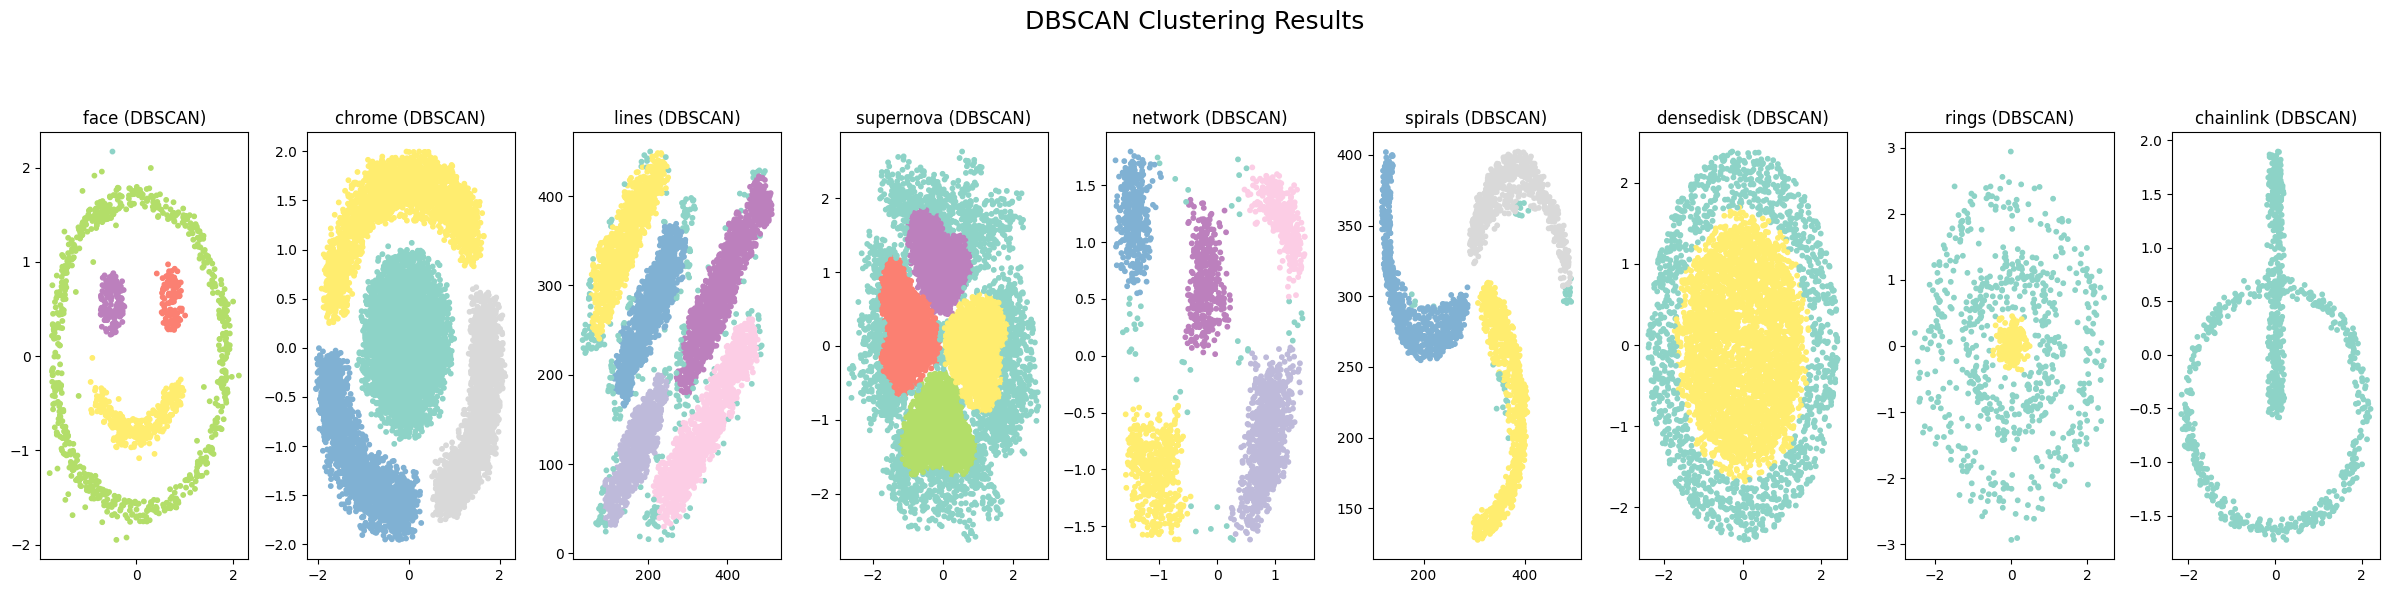

In [649]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a single row layout for original datasets (already created)
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(24, 6))
fig.suptitle('Original DATA SETS\n', size=18)

# Plot the 2D scatterplots for original datasets
axes[0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0].set_title("face (Original)")

axes[1].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[1].set_title("chrome (Original)")

axes[2].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[2].set_title("lines (Original)")

axes[3].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[3].set_title("supernova (Original)")

axes[4].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[4].set_title("network (Original)")

axes[5].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[5].set_title("spirals (Original)")

axes[6].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[6].set_title("densedisk (Original)")

axes[7].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[7].set_title("rings (Original)")

# Add a 3D plot for chainlink
ax3d = fig.add_subplot(1, 9, 9, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink (Original)")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Now the KMeans section
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(24, 6))
fig.suptitle('KMeans Clustering Results\n', size=18)

# Function to plot 2D datasets for KMeans
def plot_2d(ax, data, title):
    scatter = ax.scatter(data['x'], data['y'], c=data['kmeans_cluster'], s=10, cmap='Set3')
    ax.set_title(f"{title} (KMeans)")

# Plot each 2D dataset for KMeans
plot_2d(axes[0], kmeans_face, "face")
plot_2d(axes[1], kmeans_chrome, "chrome")
plot_2d(axes[2], kmeans_lines2, "lines")
plot_2d(axes[3], kmeans_supernova, "supernova")
plot_2d(axes[4], kmeans_network, "network")
plot_2d(axes[5], kmeans_spirals, "spirals")
plot_2d(axes[6], kmeans_densedisk, "densedisk")
plot_2d(axes[7], kmeans_rings, "rings")

# Add a 3D plot for KMeans chainlink
ax3d = fig.add_subplot(1, 9, 9, projection='3d')
scatter = ax3d.scatter(
    kmeans_chainlink['x'], kmeans_chainlink['y'], kmeans_chainlink['z'],
    c=kmeans_chainlink['kmeans_cluster'], cmap="Set3", s=10
)
ax3d.set_title("3D chainlink (KMeans)")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Now the Agglomerative Clustering section
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(24, 6))
fig.suptitle('Agglomerative Clustering Results\n', size=18)

# Function to plot 2D datasets for Agglomerative Clustering
def plot_2d(ax, data, title):
    scatter = ax.scatter(data['x'], data['y'], c=data['agg_cluster'], s=10, cmap='Set3')
    ax.set_title(f"{title} (Agglomerative)")

# Plot each 2D dataset for Agglomerative Clustering
plot_2d(axes[0], agg_face, "face")
plot_2d(axes[1], agg_chrome, "chrome")
plot_2d(axes[2], agg_lines2, "lines")
plot_2d(axes[3], agg_supernova, "supernova")
plot_2d(axes[4], agg_network, "network")
plot_2d(axes[5], agg_spirals, "spirals")
plot_2d(axes[6], agg_densedisk, "densedisk")
plot_2d(axes[7], agg_rings, "rings")

# Add a 3D plot for Agglomerative Clustering chainlink
ax3d = fig.add_subplot(1, 9, 9, projection='3d')
scatter = ax3d.scatter(
    agg_chainlink['x'], agg_chainlink['y'], agg_chainlink['z'],
    c=agg_chainlink['agg_cluster'], cmap="Set3", s=10
)
ax3d.set_title("3D chainlink (Agglomerative)")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Function to plot 2D datasets for DBSCAN
def plot_2d(ax, data, title):
    scatter = ax.scatter(data['x'], data['y'], c=data['cluster'], s=10, cmap='Set3')
    ax.set_title(f"{title} (DBSCAN)")

# Set up the subplot grid for DBSCAN
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(24, 6))
fig.suptitle('DBSCAN Clustering Results\n', size=18)

# Plot DBSCAN results for each dataset
plot_2d(axes[0], models_and_data[0][1], "face")
plot_2d(axes[1], models_and_data[1][1], "chrome")
plot_2d(axes[2], dbscan_lines2_data, "lines")
plot_2d(axes[3], models_and_data[3][1], "supernova")
plot_2d(axes[4], models_and_data[4][1], "network")
plot_2d(axes[5], dbscan_spirals_data, "spirals")
plot_2d(axes[6], models_and_data[6][1], "densedisk")
plot_2d(axes[7], models_and_data[7][1], "rings")
plot_2d(axes[8], models_and_data[8][1], "chainlink")

# Adjust layout for DBSCAN results
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
